## Project Title: House Sales Analysis in King County

### 1. Defining the Question

#### a) Specifying the Data Analytic Question

**Data Analytic Question:** How can we provide advice to homeowners in King County about how home renovations might increase the estimated value of their homes and by what amount?

#### b) Defining the Metric for Success

To determine the success of our analysis, we will consider the following metrics:

1. **Model Performance:** We will assess the overall performance of our regression models using appropriate evaluation metrics, such as mean squared error (MSE), root mean squared error (RMSE), or R-squared (R^2) value. The lower the MSE or RMSE and the higher the R^2 value, the better the model's predictive accuracy.

2. **Regression Model Coefficients:** We aim to identify at least two regression model coefficients that are statistically significant and have a meaningful impact on the estimated value of homes. These coefficients will help us provide specific recommendations to homeowners regarding the potential value increase associated with certain home renovations.

#### c). Recording the Experimental Design

The experimental design for this analysis will involve the following steps:

1. **Data Collection:** We will use the King County House Sales dataset, specifically the `kc_house_data.csv` file, which contains information about house sales in King County. The dataset includes various features such as the number of bedrooms, bathrooms, square footage, condition, and other relevant information.

2. **Data Cleaning and Exploration:** We will perform data cleaning tasks, handle missing values, and explore the dataset to gain a better understanding of the variables and their relationships. This will involve visualizations, summary statistics, and correlation analysis.

3. **Feature Selection:** Based on our domain knowledge and exploratory analysis, we will select relevant features that are likely to impact the estimated value of homes. We will consider factors such as location, size, condition, and other characteristics that influence home prices.

4. **Model Building:** We will build multiple linear regression models using different combinations of features and techniques. We will start with a basic model and iteratively refine it by adding or removing features, transforming variables, or using regularization techniques as necessary.

5. **Model Evaluation and Selection:** We will evaluate the performance of each model using appropriate evaluation metrics, such as MSE, RMSE, or R^2. Based on the results, we will select the best-performing model that provides accurate predictions and meaningful insights.

6. **Interpretation and Recommendations:** Once we have the final model, we will interpret the regression coefficients and provide recommendations to homeowners about how specific home renovations can potentially increase the estimated value of their homes.


#### d). Exploring the Dataset

Let's explore the King County House Sales dataset to get familiar with its structure and content:

- `id`: Unique identifier for a house
- `date`: Date house was sold
- `price`: Sale price (prediction target)
- `bedrooms`: Number of bedrooms
- `bathrooms`: Number of bathrooms
- `sqft_living`: Square footage of living space in the home
- `sqft_lot`: Square footage of the lot
- `floors`: Number of floors (levels) in the house
- `waterfront`: Whether the house is on a waterfront
- `view`: Quality of view from the house
- `condition`: Overall condition of the house
- `grade`: Overall grade of the house
- `sqft_above`: Square footage of the house apart from the basement
- `sqft_basement`: Square footage of the basement
- `yr_built`: Year when the house was built
- `yr_renovated`: Year when the house was renovated
- `zipcode`: ZIP Code used by the United States Postal Service
- `lat`: Latitude coordinate
- `long`: Longitude coordinate
- `sqft_living15`: The square footage of interior housing living space for the nearest 15 neighbors
- `sqft_lot15`: The square footage of the land lots of the nearest 15 neighbors

Please note that some features, such as `date`, `view`, `sqft_above`, `sqft_basement`, `yr_renovated`, `zipcode`, `lat`, `long`, `sqft_living15`, and `sqft_lot15`, may not be used in the analysis based on your project requirements. We will focus on the relevant features to answer our data analytic question.

#### e) Data Relevance

Based on our data analytic question, the dataset provides relevant information to address the problem at hand. The dataset includes key features such as the number of bedrooms, bathrooms, square footage, condition, and grade of the houses, which can help us analyze how these factors impact the estimated value of homes in King County.



### 2. Reading the Dataset

In [28]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')
import math

In [29]:
#load and preview the data
data = pd.read_csv("Data/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [30]:
# check the last 5 rows
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [31]:
#checking data types and shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The dataset is extensive, comprising over 21,500 entries and consisting of 20 columns. Most of the columns consist of numerical data, making them well-suited for linear regression analysis.

### 3. Cleaning the Dataset
In this section, we prepare the data for the analysis by converting the categorical features into numeric ones. This will allow us to apply mathematical operations and statistical methods on the data.

We use label encoding to convert the view and condition feature from text values to numeric values that represent the quality of the view from the house and the condition of the house.

In addition we use pandas functions to convert the date feature from string to datetime format and extract only the year of sale.create a new column for sell year and drop the original date column.

Finally, we convert the `sqft_basement` feature from object to int type by handling any errors that may occur during the conversion.

##### a). Converting the categorical features into numeric ones

In [32]:
#'View' column transformation
data['view'].replace(to_replace=['NONE', 'AVERAGE', 'GOOD', 'FAIR', 'EXCELLENT'], value=[0, 1, 2, 3, 4], inplace=True)

In [33]:
#'Condition' column transformation
data['condition'].replace(to_replace=['Poor', 'Fair', 'Average', 'Good', 'Very Good'], value=[1, 2, 3, 4, 5], inplace=True)

In [34]:
#'Grade' column transformation
data['grade'].replace(to_replace=['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], value=[7, 6, 8, 11, 9, 5, 10, 12, 4, 3, 13], inplace=True)

In [35]:
#'Waterfront' column transformation
data['waterfront'].replace(to_replace=['NO', 'YES'], value=[0, 1], inplace=True)

In [36]:
# Changing the sqft_basement from object to int
data['sqft_basement'] = pd.to_numeric(data['sqft_basement'], errors='coerce')

In [37]:
# Changing the date to date time
data['date'] = pd.to_datetime(data['date'])
# Extracting only the year from the column Date
data.date = data['date'].dt.year

# Creating a new column for sell year
data['sell_yr'] = pd.to_datetime(data['date'],format='%Y').dt.year
data.drop(columns='date', inplace=True)

In [38]:
#drop unnecessary columns
data.drop(columns=['id', 'lat', 'long'], inplace=True)

##### b). Handling Missing Values
In this section, we will check the percentage of missing values in each column of the data and handle them accordingly.

We will fill the missing values in the waterfront column with 0, assuming that the houses without this information do not have a waterfront. We will fill the missing values in the view column with the median value, assuming that the houses without this information have an average view.

We will drop the remaining missing values in the yr_renovated and sqft_basement columns, as they are not many and may not affect the analysis significantly. We will check the info of the data to confirm the changes and ensure that there are no more missing values in the data.

In [39]:
# Checking for NaN Values as a % of the whole Data Set 
(data.isnull().sum())/len(data)*100

price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     2.102144
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
sell_yr           0.000000
dtype: float64

In [40]:
#handling missing values in waterfront and view columns
data['waterfront'].fillna(0, inplace=True)
data['view'].fillna(data['view'].median(), inplace=True)

#dropped remaining missing values in the yr_renovated and sqft_basement columns
data.dropna(inplace=True)


#Check the info of the data to check the changes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17389 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          17389 non-null  float64
 1   bedrooms       17389 non-null  int64  
 2   bathrooms      17389 non-null  float64
 3   sqft_living    17389 non-null  int64  
 4   sqft_lot       17389 non-null  int64  
 5   floors         17389 non-null  float64
 6   waterfront     17389 non-null  float64
 7   view           17389 non-null  float64
 8   condition      17389 non-null  int64  
 9   grade          17389 non-null  int64  
 10  sqft_above     17389 non-null  int64  
 11  sqft_basement  17389 non-null  float64
 12  yr_built       17389 non-null  int64  
 13  yr_renovated   17389 non-null  float64
 14  zipcode        17389 non-null  int64  
 15  sqft_living15  17389 non-null  int64  
 16  sqft_lot15     17389 non-null  int64  
 17  sell_yr        17389 non-null  int64  
dtypes: flo

By using the median to fill missing values, you retain the overall statistical properties of the column. This approach ensures that the imputed values align with the existing data, maintaining the general trends and characteristics of the 'view' column.

Water front feature had 11% null values, this was filled with '0' on the assumption that these cells were not filled since they lacked waterfronts

Other remaining null values were dropped by row since the overall percentage impact would be minute

In [41]:
#checking the changes have been effected
data.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,sell_yr
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650,2014
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639,2014
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000,2014
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503,2015
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,4760,101930,2014


### 3. Exploratory Data Analysis

In this section, we will perform exploratory data analysis (EDA) to understand the data better and discover any patterns, trends, or outliers that may exist - using *univariate*,*bivariate* and *multivariate* analysis.

We will use descriptive statistics and visualizations to summarize the main characteristics of the data and examine the relationships between the features and the target variable.

We will also check the distribution and correlation of the variables and identify any potential problems or opportunities for the analysis.

##### a). Univariate analysis
*  Summary statistics of the target variable - price

First, we need to identify the summary statistics of the target variable - price because they can help us understand the distribution and skewness of the house prices in the data and detect any outliers or extreme values that may affect the analysis. They can also help us compare the price variable with other features and evaluate the performance of the predictive models.

count    1.738900e+04
mean     5.409426e+05
std      3.701590e+05
min      8.000000e+04
25%      3.215000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


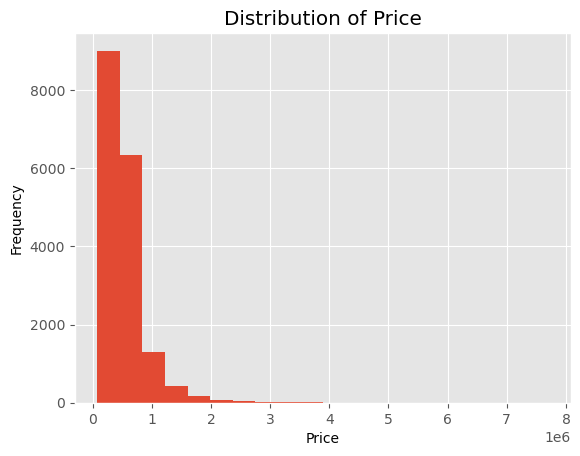

In [42]:
# Extract the "price" column
price = data['price']

# Summary statistics
price_stats = price.describe()
print(price_stats)

# Histogram
plt.style.use('ggplot')
plt.hist(price, bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

* The histogram shows that the distribution of house prices in the dataset is right-skewed. This means that there are more houses with lower prices than there are houses with higher prices.
* The summary statistics provide more details about the distribution of prices. The mean price is USD 540,942.60, the median price is USD 450,000, and the mode (the most common price) is USD 350000. The standard deviation is USD 370,159.00, which means that about 68% of the houses in the dataset have prices within USD 370,159.00 of the mean price.

Second, we need to create a box plot to investigate the price column because it can show us the median, quartiles, and range of the house prices in the data and highlight any outliers that may be too high or too low. Outliers can distort the analysis and affect the accuracy of the predictive models.

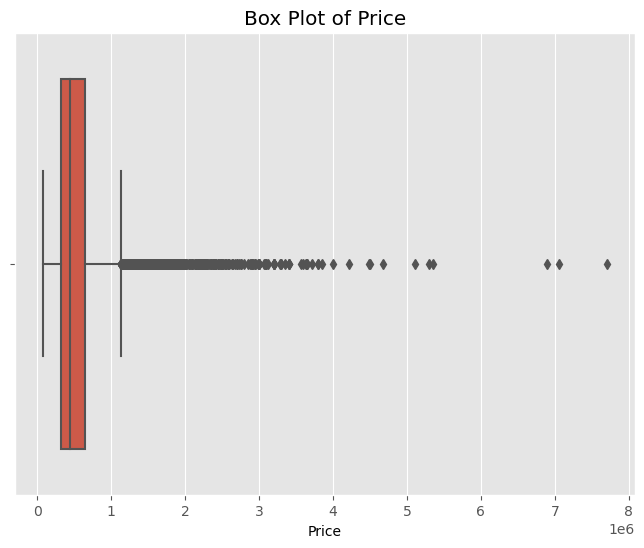

In [43]:
# Box Plot to investigate the price column
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['price'])
plt.xlabel('Price')
plt.title('Box Plot of Price')
plt.show()
# From the boxplots below it can be seen that there are a lot of outliers.

We decided to use the price column as our target variable.

The data is heavily skewed to the left i.e. leptokurtic, as was suspected due to the large number of outliers.We decided not to remove outliers as this will affect the accuracy of the data analysis, and the result could be inconclusive and/or incorrect.

##### b). Bivariate Analysis
In this section, we will perform bivariate analysis to examine the relationship between the target variable - price and the other numeric and continuous features in the data. We will use scatter plots to show the direction, strength, and shape of the relationship between two numeric variables. This will help us understand how one variable affects or is affected by another variable and identify any patterns or trends that may exist.

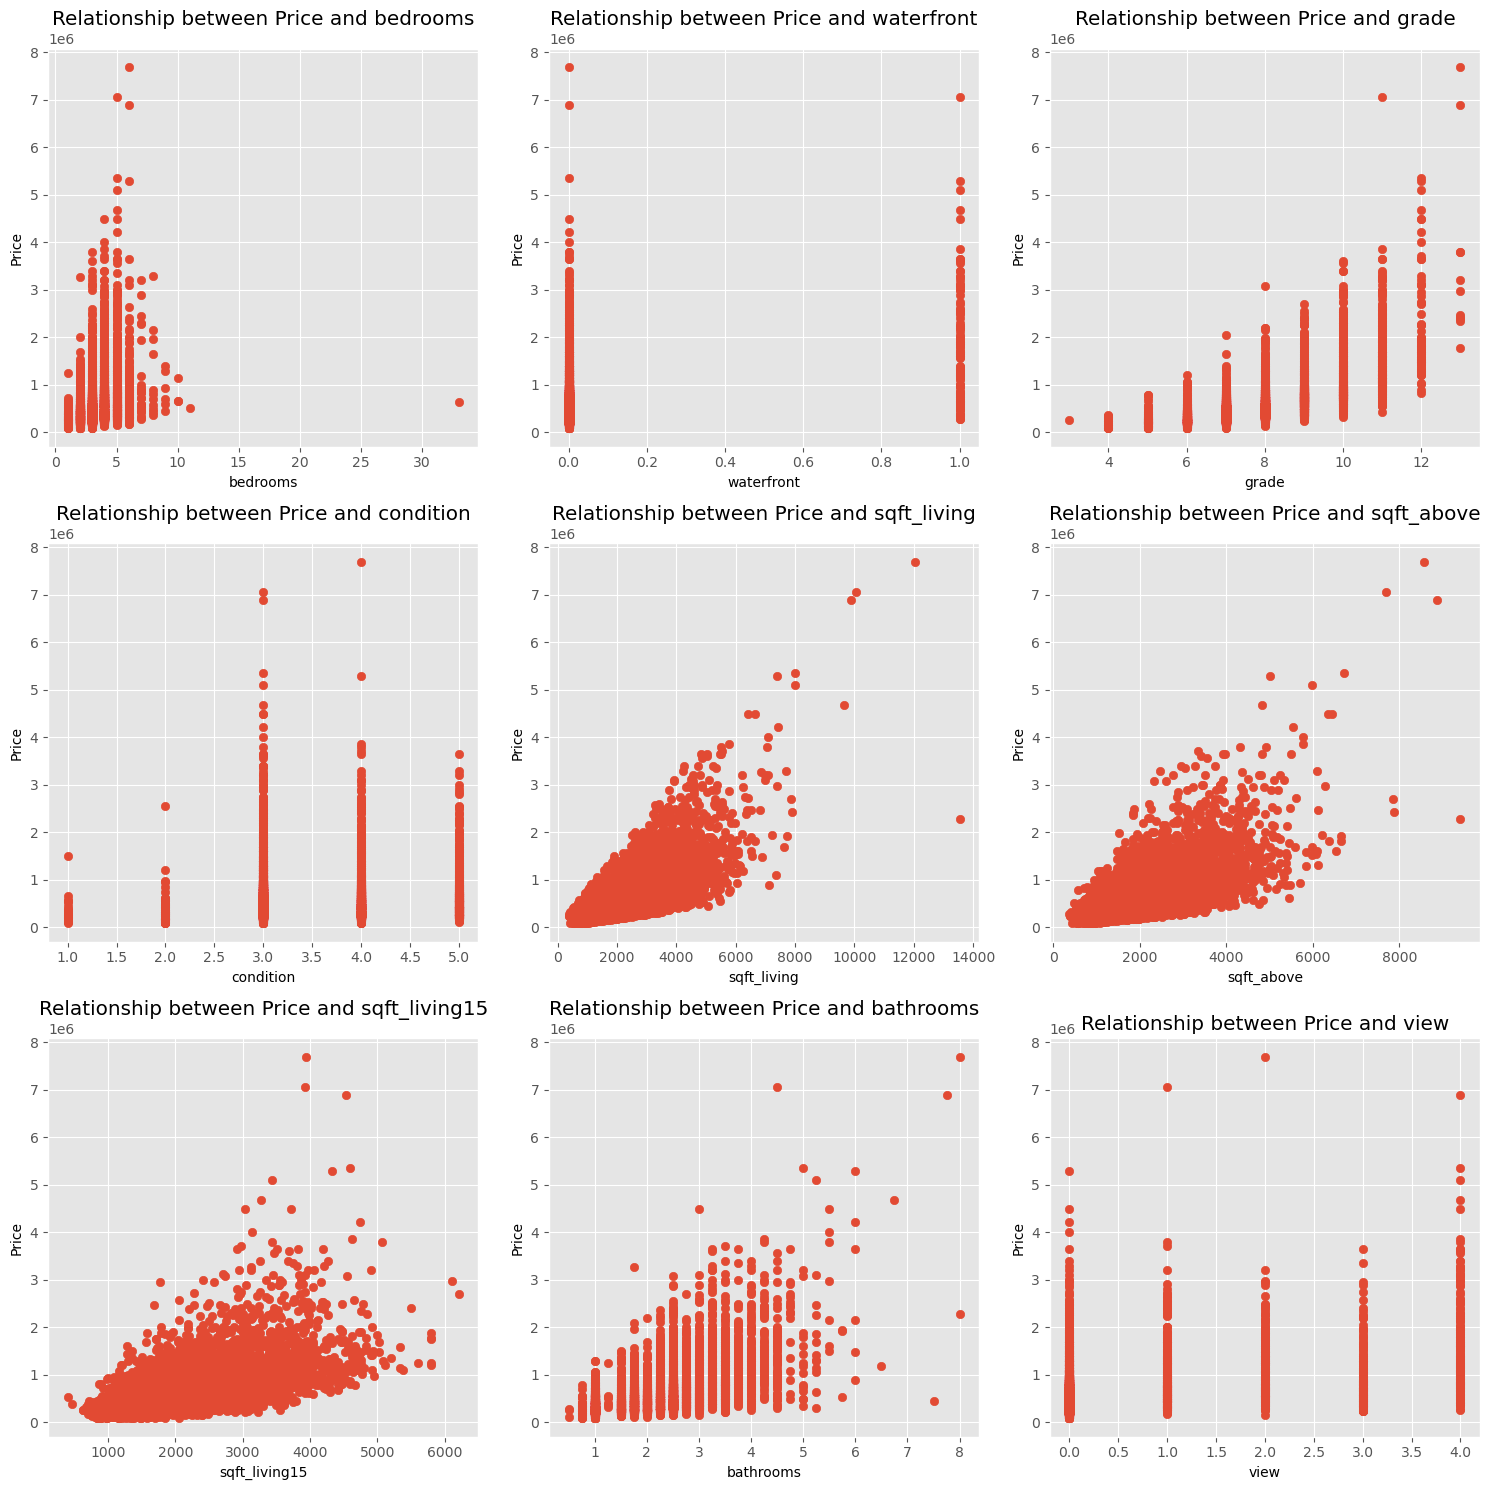

In [44]:
#relationships between our target variable and other independent variables in the dataset
variables = ['bedrooms', 'waterfront', 'grade', 'condition', 'sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms','view']
num_rows = math.ceil(len(variables) / 3)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    axes[row, col].scatter(data[var], data['price'])
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Price')
    axes[row, col].set_title(f'Relationship between Price and {var}')

plt.tight_layout()
plt.show()


The output of the scatter plots shows the relationship between the target variable (price) and the independent variables (bedrooms, waterfront, grade, condition, sqft_living, sqft_above, sqft_living15, bathrooms, view) in the dataset.

* `bedrooms`: There is a positive relationship between the number of bedrooms and the price of a house. This means that houses with more bedrooms tend to be more expensive.
* `waterfront`: There is a positive relationship between waterfront property and the price of a house. This means that houses with waterfront views tend to be more expensive.
* `grade`: There is a positive relationship between the grade of a house and the price of a house. This means that houses with higher grades tend to be more expensive.
* `ncondition`: There is a positive relationship between the condition of a house and the price of a house. This means that houses in better condition tend to be more expensive.
* `sqft_living`: There is a positive relationship between the square footage of a house and the price of a house. This means that houses with more square footage tend to be more expensive.
* `sqft_above`: There is a positive relationship between the square footage of the above-ground living space in a house and the price of a house. This means that houses with more square footage in the above-ground living space tend to be more expensive.
* `sqft_living15`: There is a positive relationship between the square footage of the living space in a house 15 years ago and the price of a house today. This means that houses that were larger 15 years ago tend to be more expensive today.
* `bathrooms`: There is a positive relationship between the number of bathrooms in a house and the price of a house. This means that houses with more bathrooms tend to be more expensive.
* `view`: There is a positive relationship between the view from a house and the price of a house. This means that houses with better views tend to be more expensive.

The scatter plots show that there is a positive relationship between most of the independent variables and the price of a house. This means that houses with higher values for these variables tend to be more expensive. The only exception is the variable "view", which has a positive relationship with price, but the relationship is not as strong as the relationships for the other variables.

##### b). Multivariate Analysis
In this section, we will perform multivariate analysis to examine the relationship between the target variable - price and multiple features in the data. We will use heatmap to visualize the correlation matrix of the features and see how they are related to each other and to the price.

A heatmap can show us the strength and direction of the correlation between two variables using different colors and shades. This will help us identify the most important features for the prediction and avoid multicollinearity problems.

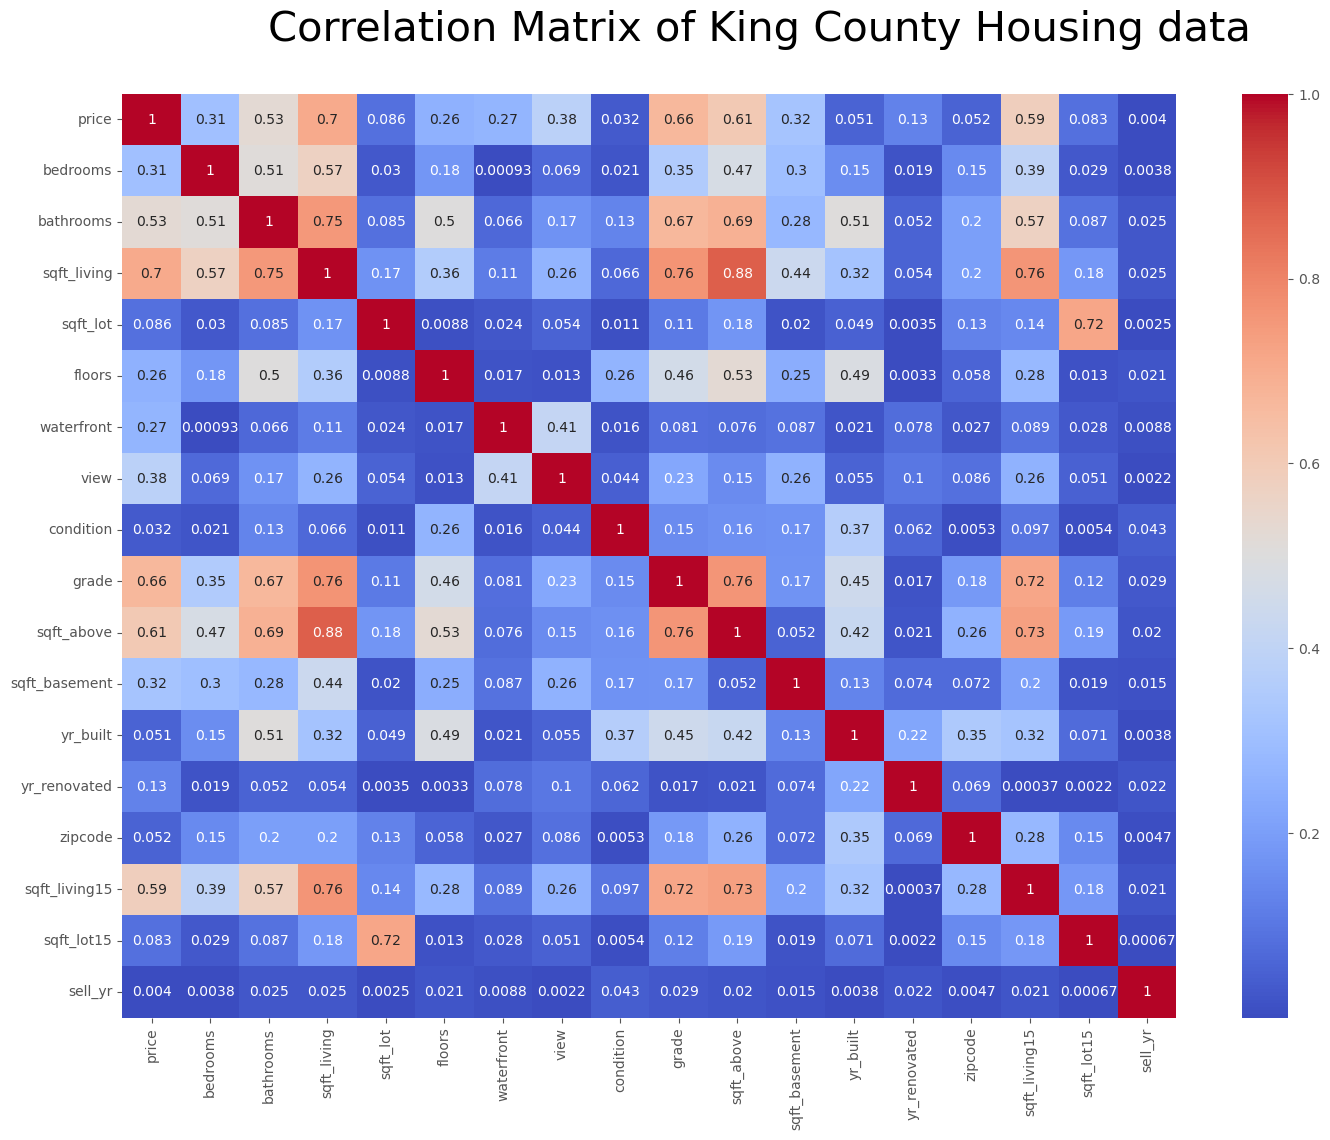

In [57]:
# plot heatmap to show the relationship between various variables
corr = data.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Correlation Matrix of King County Housing data', fontsize=30, y=.95, fontname='DejaVu Sans')
heatmap = sns.heatmap(corr, cmap='coolwarm', annot=True)
heatmap;

#### Question 1: What features have the highest correlation to the home price?
In general, a correlation value above 0.7 is considered high. Although the dataset does not contain any correlations with the price above 0.7, there are several features that exhibit moderately strong correlations. The variables sqft_living, grade, sqft_living15, sqft_above, and bathrooms demonstrate the highest correlations with the price.

### 4. Modelling
In this section, we will build and evaluate different statistical models for the house price using the features we have selected and prepared in the previous sections. We will use linear regression to fit the models and compare their performance. We will use metrics such as mean absolute error (MAE), root mean squared error (RMSE), and R-squared (R2) to measure the accuracy and goodness of fit of the models.



#### a). Simple linear regression
First, we start with a simple linear regression, whereby we assume that the house price is a linear function of the square footage of living space. We use the ordinary least squares method to estimate the slope and the intercept of the line that best fits the data. We also calculate the standard error, the t-statistic, and the confidence interval for each parameter. We use the R-squared value to measure how much of the variation in the house price is explained by the model. We use the F-statistic and the p-value to test the overall significance of the model. We use the residual plot to check the assumptions of linearity, homoscedasticity, and normality.

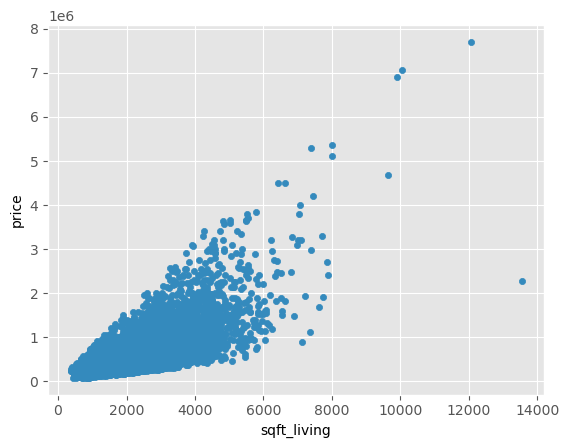

In [45]:
#Relationship between our target variable 'price' and 'sqft_living' which has the highest correlation with our target var.
data.plot.scatter(x="sqft_living", y="price");

* The scatter plot shows that there is a positive relationship between the two variables, meaning that houses with more square footage tend to be more expensive.
* The relationship is not perfectly linear, but it is clear that there is a trend. The scatter plot also shows that there is a lot of variation in the price of houses with the same square footage. This is likely due to other factors, such as the location of the house, the condition of the house, and the amenities that are included.

##### `Baseline model`

For this baseline model, we use linear regression to predict the house price based on one feature: the square footage of living space.

In [46]:
y = data["price"]
X_baseline = data[["sqft_living"]]

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 1.708e+04
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:17:00   Log-Likelihood:            -2.4168e+05
No. Observations:               17389   AIC:                         4.834e+05
Df Residuals:                   17387   BIC:                         4.834e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.061e+04   4945.383    -10.234      

Because of the negative const in our model standardization should be the most effective practice

Standardization is a technique that transforms the features to have zero mean and unit variance. It helps to reduce the effect of outliers and scale differences among the features. We decided to use standardization because our model had a negative intercept, which means that the predicted house price would be negative when all the features are zero.

This is unrealistic and indicates that the model is biased by the original scale of the features. By standardizing the features, we hope to improve the accuracy and interpretability of the model.

In [47]:
from sklearn.preprocessing import StandardScaler

y = data["price"]
X_baseline = data[["sqft_living"]]

scaler = StandardScaler()
X_baseline_standardized = scaler.fit_transform(X_baseline.values.reshape(-1, 1))  # Standardizing the independent variable

X_baseline_standardized = sm.add_constant(X_baseline_standardized)
baseline_model = sm.OLS(y, X_baseline_standardized)
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 1.708e+04
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:17:00   Log-Likelihood:            -2.4168e+05
No. Observations:               17389   AIC:                         4.834e+05
Df Residuals:                   17387   BIC:                         4.834e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.409e+05   1993.627    271.336      0.0

In [48]:
baseline_results.params

const    540942.621830
x1       260584.577375
dtype: float64

* R-squared and Adj.R-squared value represents the proportion of variance that is explained by the predictor(s). The R-squared value is 0.492 indicating that approximately 49.2% of the variability in the "price" can be explained by the "sqft-living" predictor alone.

* The coefficient estimates show the relationship between the independent variable (sqft_living) and the dependent variable (price) after standardization. The constant coefficient is 540942.621830, representing the estimated price when the standardized sqft_living is zero. The coefficient for the standardized sqft_living (x1) is 260584.577375, indicating that for every one standard deviation increase in sqft_living, the price is estimated to increase by 260584.577375 units, assuming other variables are held constant

* The p-values (P>|t|) associated with the coefficients determine their statistical significance. In this case, both the const and sqft_living coefficients have p-values of 0.000, indicating that they are statistically significant

Here, we use linear regression to predict house price from living space. We use statsmodels in Python and plot the results.

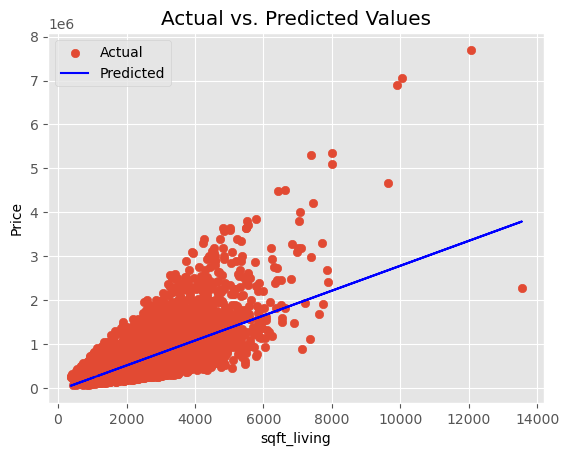

In [49]:
# Fit the simple linear regression model
X = data['sqft_living']  # Independent variable
y = data['price']  # Dependent variable
X = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X)  # Create the ordinary least squares model
results = model.fit()  # Fit the model to the data

# Visualize the linearity
plt.scatter(X['sqft_living'], y, label='Actual')  # Scatter plot of actual values
plt.plot(X['sqft_living'], results.predict(), color='blue', label='Predicted')  # Line plot of predicted values
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

Then, we plot the residuals of the model versus the house price. The plot shows how the residuals vary around zero. The plot helps us to check the homoscedasticity assumption.

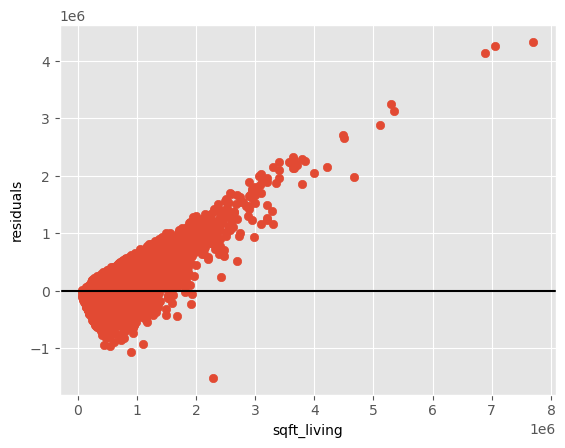

In [50]:
#residuals for predicted values, 
fig, ax = plt.subplots()

ax.scatter(data["price"], baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals"); 

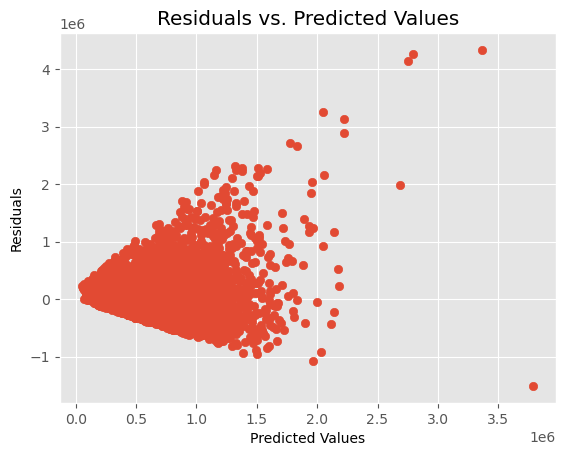

In [51]:
# Assuming you have already fitted the linear regression model and obtained the residuals
residuals = baseline_results.resid
# Assumption 1: Linearity
predicted = baseline_results.fittedvalues
plt.scatter(predicted, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

Afterward, we visualize the regression line that shows how well the linear regression model fits the data. We use matplotlib in Python to plot the data points and the regression line. The plot helps to assess the linearity of the relationship between the house price and the square footage of living space.



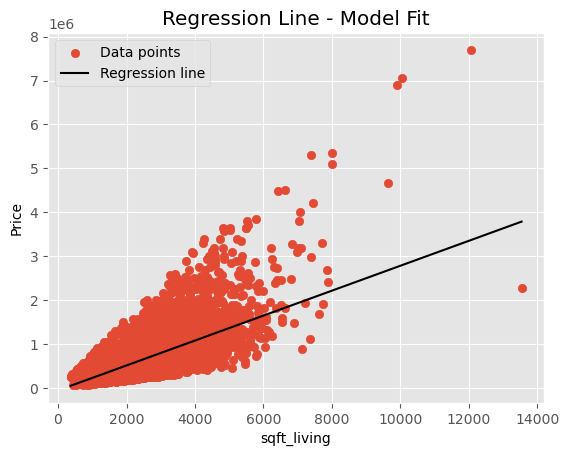

In [52]:
#visualizing the regression line to show model fit
#Scatter plot of data points
plt.scatter(data["sqft_living"], data["price"], label="Data points")

# Regression line
x = np.linspace(data["sqft_living"].min(), data["sqft_living"].max(), 100)
y = results.params[0] + results.params[1] * x
plt.plot(x, y, color="black", label="Regression line")

plt.xlabel("sqft_living")
plt.ylabel("Price")
plt.title("Regression Line - Model Fit")
plt.legend()
plt.show()

#### b.) Multiple linear regression


Here we use multiple linear regression to predict house price from more than one feature. Multiple linear regression models the linear relationship between a dependent variable and two or more independent variables. We use sklearn and OLS in Python to train and test the model on the data.

First, we define a function to check for multicollinearity among the features

In [56]:
Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .75 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame(
    {'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features}
    ).sort_values(by='Correlations', ascending=False)
MC_df

,Correlations,Features
3,0.875884,"[sqft_living, sqft_above]"
7,0.875884,"[sqft_above, sqft_living]"
2,0.764596,"[sqft_living, grade]"
5,0.764596,"[grade, sqft_living]"
6,0.758236,"[grade, sqft_above]"
8,0.758236,"[sqft_above, grade]"
4,0.758152,"[sqft_living, sqft_living15]"
9,0.758152,"[sqft_living15, sqft_living]"
0,0.753507,"[bathrooms, sqft_living]"
1,0.753507,"[sqft_living, bathrooms]"


#### Question 2: What features have the strongest correlations with other predicting variables?
Although sqft_living and sqft_above are both highly correlated with price, only one of them can be included in a multiple regression model because they are also highly correlated with each other. Fortunately, the other two variables whose correlation violates this assumption have a relatively weak correlation with price.

## Model 1

 For the first multiple regression model, we'll include the four variables that had the highest correlations with price without violating the multicollinearity assumption. We use the correlation matrix to select the four features that have the strongest positive correlations with the price variable, and we check for multicollinearity among them using our function.

The four features are sqft_living, sqft_living15, grade, and bathrooms. These features represent the living area of the house, the average living area of the 15 nearest neighbors, the overall quality of the house, and the number of bathrooms in the house. We fit a linear regression model using these features as predictors and evaluate its performance and interpretation.

In [58]:
#isolate X and Y 
y = data.price
X = data[['sqft_living','sqft_living15', 'grade', 'bathrooms']]
X.head(1)

,sqft_living,sqft_living15,grade,bathrooms
0,1180,1340,7,1.0


In [59]:
#Add a constant
X = sm.add_constant(X)
X.head()

,const,sqft_living,sqft_living15,grade,bathrooms
0,1.0,1180,1340,7,1.00
1,1.0,2570,1690,7,2.25
3,1.0,1960,1360,7,3.00
4,1.0,1680,1800,8,2.00
5,1.0,5420,4760,11,4.50


In [60]:
#Training and Test Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

In [61]:
#Multilinear regression
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     4042.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:28:17   Log-Likelihood:            -1.9269e+05
No. Observations:               13911   AIC:                         3.854e+05
Df Residuals:                   13906   BIC:                         3.854e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -5.94e+05   1.68e+04    -35.324

* R-squared: The adj r-squared value, 0.538, indicates that the model can account for about 54% of the variability of price around its mean.

In [62]:
#Predict

predictions = model.predict(X_test)
predictions[:4]

1643     308931.719707
20681    471111.926190
17915    305666.367465
20505    397696.582367
dtype: float64

In [63]:

#Accuracy Assesment
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE:', round(mean_absolute_error(y_test, predictions)))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test, predictions)),1))

MAE: 166500
RMSE: 256104.9


## Model 2